# La exponencial compleja

- Jupyter notebook por David Ricardo Vivas Ordóñez
- Práctica en investigación 1
- Profesor Victor Bucheli

In [0]:
import numpy as np
import scipy.special
from scipy.special import factorial as vFactorial      # función factorial que recibe vectores como argumentos
import matplotlib.pyplot as plt
import timeit

In [0]:
# pequeña función para mostrar números complejos más legibles
def printComplex(w):
    w = np.round(w,3)
    a = np.real(w)
    b = np.imag(w)
    print(a," + ", b,"j")
    return 

La librería numpy de python posee una implementación de números complejos por defecto. Para definir un número complejo $x$ en numpy se usa la sintaxis:

In [0]:
x = 3 + 2j      #Número complejo de parte real 3 y parte imaginaria 2

Comos se puede observar, en numpy la unidad imaginaria se denota por la letra $j$. Esta notación es común en ingenierías, a diferencia de las ciencias exactas en las que se acostumbra a usar la letra $i$. Aquí usaremos la letra $i$ para mayor compatibilidad con los textos de mecánica cuántica y computación cuántica.

### La exponencial compleja


Algunas funciones reales se extienden a los números complejos mediante su serie de potencias análoga. En particular,
la función exponencial de un número complejo z se define como:

$$
e^z = \sum_{k=0}^{\infty} \frac{z^k}{k!} 
$$

Calculemos entonces la exponencial de un número mediante su definición como serie de potencias:

In [0]:
# implementación con loop

def complexExponentialLoop(z, k=50):            # k es el orden hasta el cuál se va a calcular la serie de taylor
     
    zTaylor = 0;
       
    for k in range(0,k+1):
        zTaylor += np.power(z,k) / vFactorial(k)
            
    return zTaylor

Ya podemos llamar nuestra exponencial compleja:

In [0]:
z = 0 + (np.pi/2)*(1j)
zExp = complexExponentialLoop(z, k=50)
printComplex(zExp)

0.0  +  1.0 j


### Implementación vectorizada de la exponencial compleja

La librería numpy nos permite implementar funciones como la exponencial compleja mediante operaciones directas entre vectores, a modo de reducir el tiempo de cómputo en relación a un loop:

In [0]:
# implementación vectorizada

def complexExponentialVec(z, k=50):             # k es el orden hasta el cuál se va a calcular la serie de taylor
    
    index = np.linspace(0, k, num=k+1)          # vector de índices, para facilitar una implementación vectorizada
    
    taylorSeries = np.power(z,index) / vFactorial(index)             
    zTaylor = np.sum(taylorSeries)
    
    return zTaylor

La diferencia de rendimiento es más notable entre más grande sea el orden de la aproximación:

In [0]:
start = timeit.default_timer()
z = complexExponentialVec(3 + (np.pi/3)*1j,200)
stop = timeit.default_timer()
loopTime = stop-start

print('Vector implementation runtime: ', loopTime)  
printComplex(z)

start = timeit.default_timer()
w = complexExponentialLoop(3 + (np.pi/3)*1j,200)
stop = timeit.default_timer()
vecTime = stop-start

print('Loop implementation runtime: ', vecTime)  
printComplex(w)

print("La implementación vectorizada es", vecTime/loopTime, "veces más rápida que la implementación en loop")

Vector implementation runtime:  0.0004384630000018319
10.043  +  17.395 j
Loop implementation runtime:  0.002223699000005297
10.043  +  17.395 j
La implementación vectorizada es 5.071577305259523 veces más rápida que la implementación en loop


### La identidad de Euler

Centrémonos ahora en el caso particular $e^{ {i}x }$ con $x$ un número real, la serie de potencias es:

$$
e^{{i} x} = \sum_{k=0}^{\infty} \frac{{({i} x)}^k}{k!}
$$

Usando la propiedad $i^2 = -1$ y reordenando índices, se puede escribir:

$$
e^{{i} x} = \sum_{k=0}^{\infty} \frac{{({i} x)}^k}{k!} = \sum_{k=0}^{\infty} \frac{{({{-1)}^k {x}^{2k}}}}{(2k)!} + {i} \sum_{k=0}^{\infty} \frac{(-1)^k x^{2k+1}}{(2k+1)!}
$$

Sin embargo, recordemos que seno y coseno se definen en términos de sus series de potencias como:

$$
\sin(x) = \sum_{k=0}^{\infty} \frac{(-1)^k x^{2k+1}}{(2k+1)!}
$$

$$
\cos(x) = \sum_{k=0}^{\infty} \frac{{({{-1)}^k {x}^{2k}}}}{(2k)!}
$$

Podemos escribir entonces:
$$
e^{i x} = \cos{x} + {i} \sin{x}
$$

La última igualdad obtenida es conocida como la *fórmula de Euler*, y es uno de los resultados más importantes de la matemática. Para un número complejo $z = a + b i$ cualquiera, se tiene:

$$
e^{z} = e^{a + b i} = e^{a} e^{b i} = e^{a}( \cos{x} + {i} \sin{x} )
$$

A simple vista la fórmula de Euler parece poco más que un resultado curioso; pero esta identidad es en gran parte la responsable de las propiedades extrañas pero útiles que exhiben los números complejos. 

Implementemos ahora la fórmula de Euler:

In [0]:
def eulerIdentity(z):
    
    zReal = np.real(z)
    zArgument = np.imag(z)
    zEuler = np.exp(zReal)*(np.cos(zArgument) + np.sin(zArgument)*1j)    
    
    return zEuler

Probemos nuestra función:

In [0]:
z = 0 + (np.pi/2)*(1j)
zEuler = eulerIdentity(0 + (np.pi/2)*(1j))
printComplex(zEuler)

0.0  +  1.0 j


Podemos verificar esta identidad usando nuestra propia implementación de la exponencial compleja:

In [0]:
z = 0 + (np.pi/2)*(1j)

zExp = complexExponentialVec(z, 100)
print("La exponencial compleja da como resultado:")
printComplex(zExp)

zEuler = eulerIdentity(z)
print("La identidad de Euler da como resultado:")
printComplex(zEuler)

La exponencial compleja da como resultado:
0.0  +  1.0 j
La identidad de Euler da como resultado:
0.0  +  1.0 j


### Representación polar de un número complejo

Al igual que un vector en el plano cartesiano, un número complejo arbitrario se puede escribir en coordenadas polares como:

$$
z = a + bi = r( \cos \theta + i \sin \theta )
$$

Donde $r = |z|$  es el radio del número complejo en coordenadas polares y $\theta = \arctan( \frac{b}{a} )$ es el ángulo del número complejo respecto al eje real. Como se habrá podido notar, la fórmula de Euler nos permite abreviar la representación polar de un número complejo como:

$$
z = r e^{i \theta}
$$

Y el cálculo de esta expresión nos arroja la representación explícita del número complejo en términos de sus componentes real e imaginaria. Con esta información podemos programar fácilmente una transformación de coordenadas de números complejos a su representación polar $(r,\theta)$:

In [0]:
def complexToPolar(z):
    
    a = np.real(z)
    b = np.imag(z)   
    if a==0 and b>0:
        theta=np.pi/2;
    elif a==0 and b<0:
        theta=-np.pi/2;
    else:
        theta = np.arctan(b/a)
    r = np.sqrt(a*a + b*b)
    zPolar = [r,theta]
    return zPolar
    

In [0]:
z = 3 + 26j
zPolar = complexToPolar(z)
print(zPolar)

[26.1725046566048, 1.4559197213779975]


Similarmente, podemos usar nuestra identidad de Euler para obtener la reprentación explícita de un número a partir de su representación polar:

In [0]:
def polarToComplex(input):
    r = input[0]
    theta = input[1]
    z = r*eulerIdentity(theta*1j)
    return z

In [0]:
z = polarToComplex(zPolar)
printComplex(z)

3.0  +  26.0 j


Grafiquemos ahora un número complejo en ambas representaciones:

In [0]:
def polarPlot( input ):
    r = input[0]
    theta = input[1]
    plt.figure(figsize=(7, 7), dpi=100, facecolor='w', edgecolor='k')
    plt.polar([0,theta], [0,r], marker = 'o', color = 'r')
    plt.grid(True)
    plt.xlabel("eje real", labelpad=20)
    plt.ylabel("eje imaginario", labelpad=40)
    plt.show()
    return None

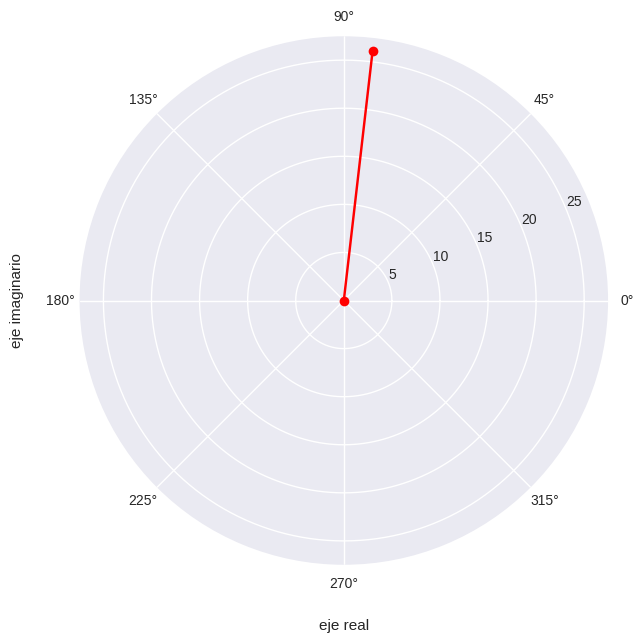

In [0]:
polarPlot(zPolar)

In [0]:
def complexPlot(z):
    a = np.real(z)
    b = np.imag(z)
    plt.figure(figsize=(7, 7), dpi=100, facecolor='w', edgecolor='k')
    plt.plot([0,a],[0,b], color='r')
    plt.scatter(a,b, color='r')
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.grid(True)
    plt.ylim(-b - b/5, b + b/5)
    plt.xlim(-a - a/5, a + a/5)
    plt.xlabel("eje real")
    plt.ylabel("eje imaginario")
    plt.show()
    return None

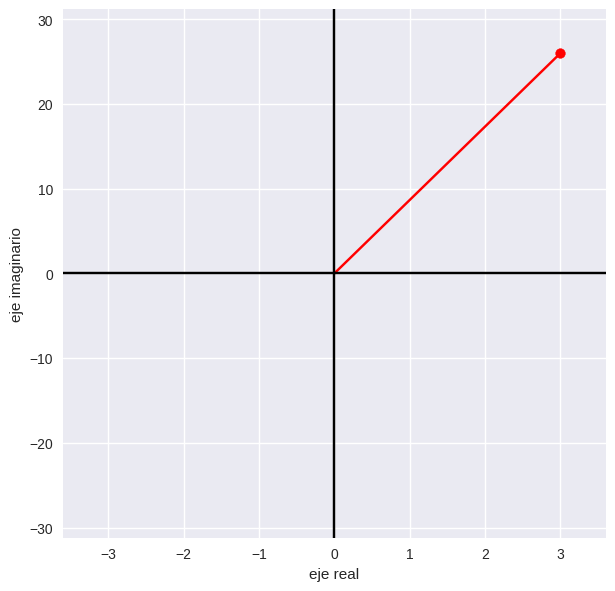

In [0]:
complexPlot(z)